# Increased feed Heat Exchanger fouling scenario

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 12})

In [2]:
df = pd.read_excel('columns.xlsx')
col = df['Symbol'].values
col = col.tolist()

In [3]:
df_stableFeedFlow = pd.read_csv(r'C:\Users\akpra\OneDrive\Desktop\Fluid-Catalytic-Cracking-Unit-Dataset-for-Process-Monitoring-Evaluation-main\NOC_stableFeedFlow_outputs.csv',header=None)
df_stableFeedFlow.set_index = df_stableFeedFlow.iloc[:,0]
df_stableFeedFlow = df_stableFeedFlow.drop(columns=0)
df_stableFeedFlow.columns= col
df_stableFeedFlow.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
780   165.08  79.977  460.66  34.4    -6.4  28  2.6813  1566.0  616.01   
2798  165.06  76.058  460.98  34.4    -6.4  28  2.6811  1563.9  616.00   
1499  164.72  75.789  460.82  34.4    -6.4  28  2.6761  1562.9  616.01   
1128  164.99  78.381  460.44  34.4    -6.4  28  2.6809  1566.8  616.00   
2437  164.83  79.256  460.35  34.4    -6.4  28  2.6768  1566.4  615.99   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
780   968.99  ...  1642.7   215.08   3013.3  315.13  509.92  628.34  45.644   
2798  969.00  ...  1642.4   212.66   2943.7  311.38  509.70  627.94  50.207   
1499  969.00  ...  1641.2   219.64   2935.9  311.08  509.61  627.97  50.520   
1128  969.01  ...  1641.7   214.58   2978.0  313.50  509.78  628.10  47.578   
2437  968.97  ...  1647.0   214.90   2979.3  314.06  509.68  627.95  46.822   

          V8     V10     V11  
780   49.896  49.492  47.154  
2798  49.381  49.052  47.161  
1499  49.303  49.623  47.096  
1128  49.587  49.147  47.114  
2437  49.513  50.081  47.429  

[5 rows x 46 columns]

In [4]:
df_varyingFeedFlow=pd.read_csv(r'C:\Users\akpra\OneDrive\Desktop\Fluid-Catalytic-Cracking-Unit-Dataset-for-Process-Monitoring-Evaluation-main\NOC_varyingFeedFlow_outputs.csv',header=None)
df_varyingFeedFlow.set_index = df_varyingFeedFlow.iloc[:,0]
df_varyingFeedFlow = df_varyingFeedFlow.drop(columns=0)
df_varyingFeedFlow.columns= col
df_varyingFeedFlow.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
1157  168.65  78.205  460.82  34.4    -6.4  28  2.7358  1587.2  616.00   
2807  164.61  75.967  461.56  34.4    -6.4  28  2.6754  1557.6  616.00   
5665  162.73  76.255  461.42  34.4    -6.4  28  2.6421  1546.9  615.99   
1717  166.24  78.096  461.56  34.4    -6.4  28  2.7039  1567.7  616.00   
3703  163.33  79.917  460.63  34.4    -6.4  28  2.6547  1555.4  616.00   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
1157  968.95  ...  1688.8   204.83   3503.4  322.15  513.86  633.33  39.573   
2807  969.03  ...  1633.3   210.95   2880.0  310.10  509.22  627.08  51.506   
5665  968.98  ...  1607.7   221.72   2612.2  305.19  506.62  623.33  56.779   
1717  969.03  ...  1668.6   224.08   3264.2  318.39  512.01  631.35  43.028   
3703  969.03  ...  1614.3   219.34   2744.0  310.16  507.57  624.74  50.529   

          V8     V10     V11  
1157  56.744  51.706  49.437  
2807  48.529  47.808  46.693  
5665  44.813  47.386  45.484  
1717  53.485  51.880  48.442  
3703  46.221  47.526  45.769  

[5 rows x 46 columns]

In [5]:
df_UAf_decrease = pd.read_csv(r'C:\Users\akpra\OneDrive\Desktop\Fluid-Catalytic-Cracking-Unit-Dataset-for-Process-Monitoring-Evaluation-main\UAf_decrease_outputs.csv',header=None)
df_UAf_decrease.set_index = df_UAf_decrease.iloc[:,0]
df_UAf_decrease = df_UAf_decrease.drop(columns=0)
df_UAf_decrease.columns= col
df_UAf_decrease.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
777   165.24  79.984  461.13  34.4    -6.4  28  2.6874  1677.7  616.01   
1091  165.07  78.673  461.60  34.4    -6.4  28  2.6814  1673.3  616.01   
425   165.17  79.130  460.91  34.4    -6.4  28  2.6805  1591.9  616.00   
296   165.11  78.273  460.75  34.4    -6.4  28  2.6845  1581.0  616.01   
61    165.11  75.783  461.39  34.4    -6.4  28  2.6824  1561.7  616.00   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
777   969.07  ...  1649.0   204.13   3027.7  315.24  510.13  628.31  45.449   
1091  969.00  ...  1646.1   211.52   2989.5  313.85  509.86  628.14  47.156   
425   968.96  ...  1637.0   212.31   2967.4  313.73  509.65  627.82  47.133   
296   969.04  ...  1647.7   210.22   2993.8  313.60  509.93  628.24  47.396   
61    969.00  ...  1643.2   212.19   2942.3  311.10  509.72  627.95  50.454   

          V8     V10     V11  
777   50.122  48.487  47.505  
1091  49.720  49.337  47.356  
425   49.374  48.705  46.860  
296   49.836  49.264  47.445  
61    49.409  48.961  47.206  

[5 rows x 46 columns]

In [6]:
df_UAf_decrease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   F3           1440 non-null   float64
 1   Tatm         1440 non-null   float64
 2   T1           1440 non-null   float64
 3   P4           1440 non-null   float64
 4   deltaP       1440 non-null   float64
 5   P6           1440 non-null   int64  
 6   Fair         1440 non-null   float64
 7   T3           1440 non-null   float64
 8   T2           1440 non-null   float64
 9   Tr           1440 non-null   float64
 10  Treg         1440 non-null   float64
 11  Lsp          1440 non-null   float64
 12  Tcyc         1440 non-null   float64
 13  Tcyc - Treg  1440 non-null   float64
 14  Cco,sg       1440 non-null   int64  
 15  Co2,sg       1440 non-null   float64
 16  P5           1440 non-null   float64
 17  V4           1440 non-null   float64
 18  V6           1440 non-null   float64
 19  V7    

In [7]:
df_UAf_decrease.describe().T

count          mean           std           min           25%  \
F3           1440.0    164.964931  1.705031e-01    164.480000    164.840000   
Tatm         1440.0     78.342074  1.495206e+00     75.014000     77.206250   
T1           1440.0    460.921306  3.773500e-01    459.880000    460.660000   
P4           1440.0     34.400000  8.884870e-13     34.400000     34.400000   
deltaP       1440.0     -6.400000  1.732550e-13     -6.400000     -6.400000   
P6           1440.0     28.000000  0.000000e+00     28.000000     28.000000   
Fair         1440.0      2.679885  3.071059e-03      2.671800      2.677700   
T3           1440.0   1631.535556  4.738479e+01   1558.900000   1584.475000   
T2           1440.0    615.999743  7.034361e-03    615.960000    616.000000   
Tr           1440.0    968.999750  3.104291e-02    968.910000    968.980000   
Treg         1440.0   1250.001528  5.095774e-02   1249.900000   1250.000000   
Lsp          1440.0     29.653148  9.402505e-02     29.376000     29.586000   
Tcyc         1440.0   1255.279028  5.020209e-02   1255.200000   1255.200000   
Tcyc - Treg  1440.0      5.278568  3.786855e-02      5.187000      5.250200   
Cco,sg       1440.0  29881.456250  4.867664e+01  29737.000000  29846.000000   
Co2,sg       1440.0      0.012471  1.692165e-04      0.012067      0.012344   
P5           1440.0     24.900000  6.752501e-13     24.900000     24.900000   
V4           1440.0     46.218401  3.991914e-01     45.335000     45.914250   
V6           1440.0     24.783983  1.008298e-01     24.532000     24.708000   
V7           1440.0     54.577811  6.263034e-02     54.413000     54.534000   
V3           1440.0     46.982208  1.595724e-02     46.937000     46.971000   
V1           1440.0     58.694293  5.779836e-01     57.569000     58.161750   
V2           1440.0     45.315695  5.303164e-02     45.177000     45.283000   
Frgc         1440.0  49572.277083  6.081520e+01  49407.000000  49529.000000   
Fsc          1440.0  49572.236806  6.126673e+01  49411.000000  49529.000000   
ACAB         1440.0    280.687549  1.405517e+00    277.550000    279.710000   
AWGC         1440.0    204.330486  2.734571e+00    198.270000    202.257500   
F5           1440.0   2016.612847  1.985887e+01   1977.900000   1998.300000   
F7           1440.0   3735.767917  5.533354e+00   3722.500000   3731.800000   
Fsg          1440.0    160.793132  1.845920e-01    160.310000    160.660000   
FV11         1440.0  28081.818750  3.012223e+02  27411.000000  27854.250000   
P1           1440.0     14.637990  1.015644e-04     14.637000     14.638000   
P2           1440.0     35.044535  2.357686e-02     34.995000     35.026000   
FLPG         1440.0   3032.567014  4.823743e+01   2926.000000   2995.775000   
FLN          1440.0   3921.324236  4.809104e+01   3852.500000   3878.700000   
FHN          1440.0    708.488417  4.016996e+00    696.510000    705.877500   
FLCO         1440.0   1642.707361  4.562635e+00   1630.400000   1639.400000   
FSlurry      1440.0    214.301500  4.559457e+00    201.700000    210.787500   
FReflux      1440.0   2977.411250  2.315561e+01   2923.500000   2960.100000   
Tfra         1440.0    313.424194  1.300492e+00    310.550000    312.430000   
T10          1440.0    509.775236  1.368354e-01    509.380000    509.680000   
T20          1440.0    628.078847  1.482783e-01    627.680000    627.990000   
V9           1440.0     47.635750  1.609722e+00     45.383000     46.211750   
V8           1440.0     49.591987  2.162617e-01     49.074000     49.419000   
V10          1440.0     49.332665  5.618536e-01     47.652000     48.962000   
V11          1440.0     47.171890  2.516454e-01     46.498000     46.986000   

                      50%           75%           max  
F3             164.970000    165.080000    165.520000  
Tatm            78.782000     79.699250     80.057000  
T1             460.910000    461.190000    461.930000  
P4              34.400000     34.400000     34.400000  
deltaP          -6.4

<AxesSubplot:>

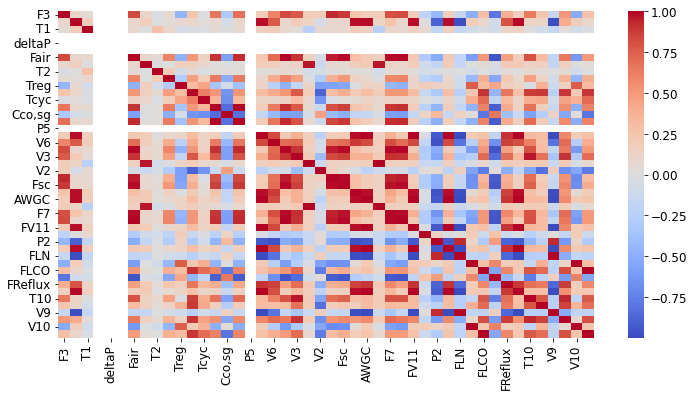

In [8]:
sns.heatmap(df_UAf_decrease.corr(),cmap='coolwarm')

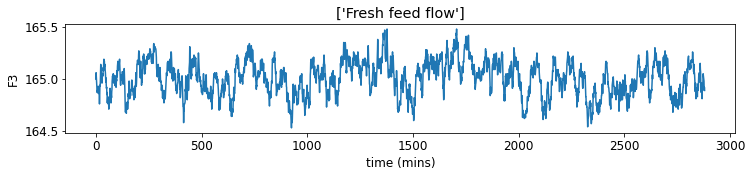

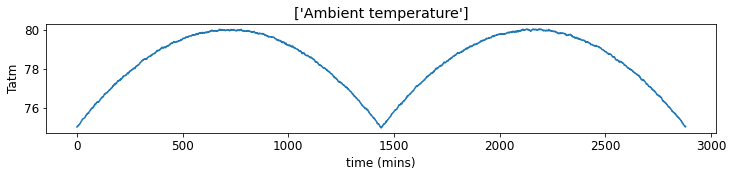

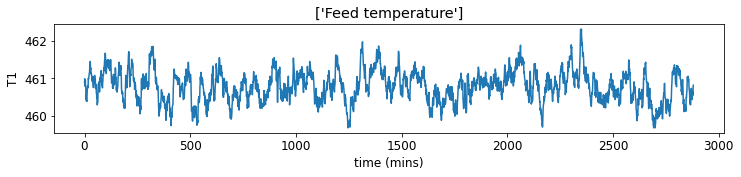

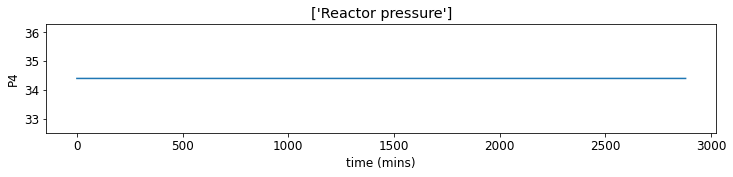

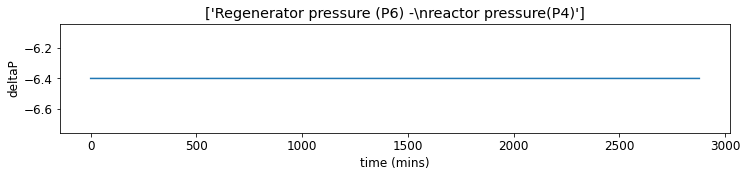

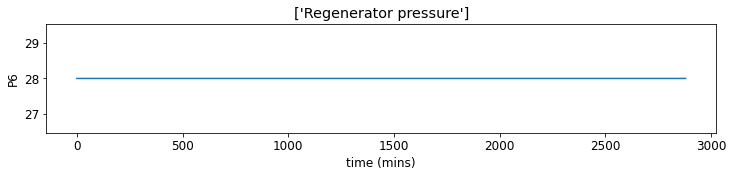

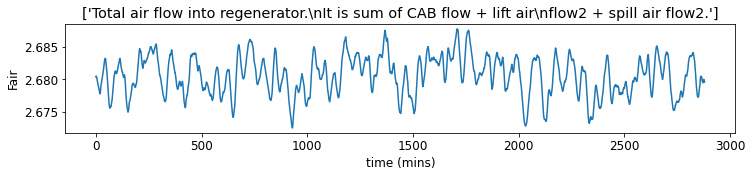

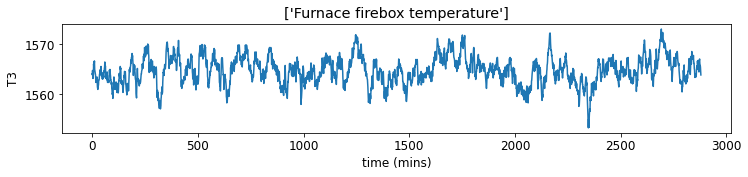

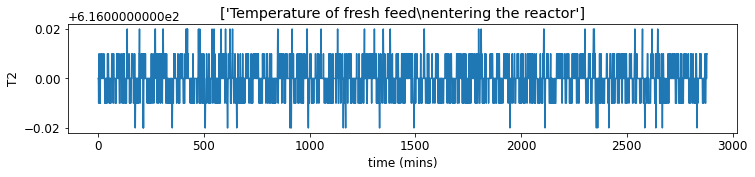

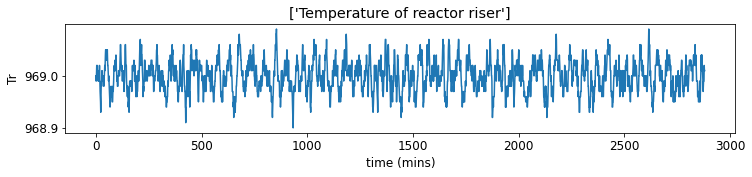

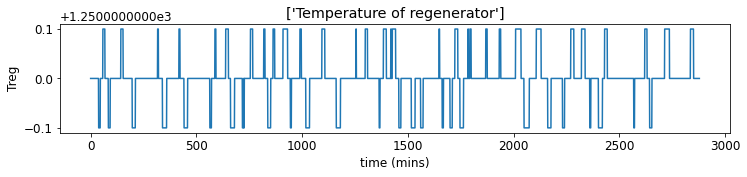

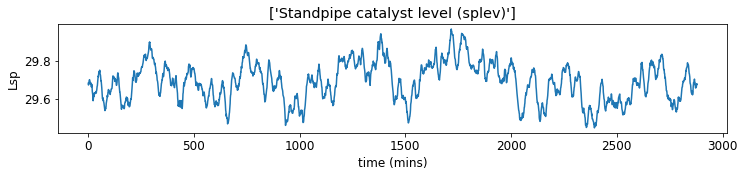

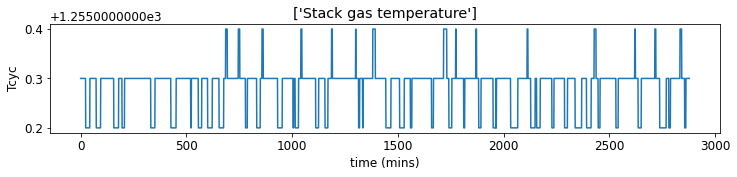

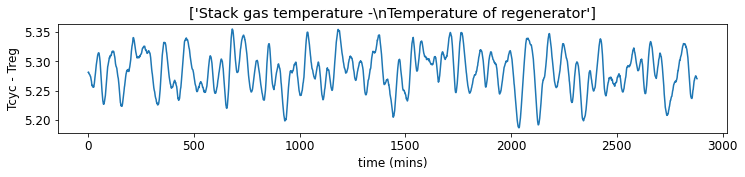

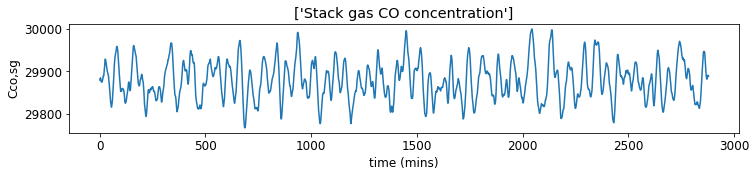

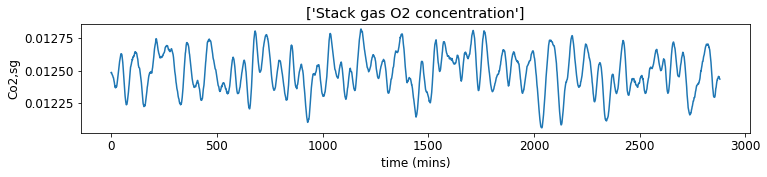

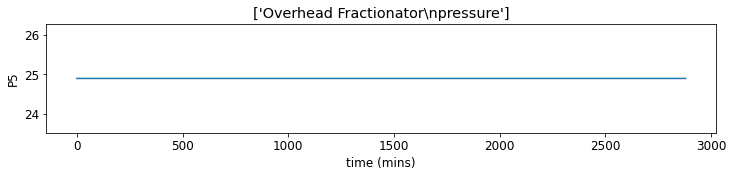

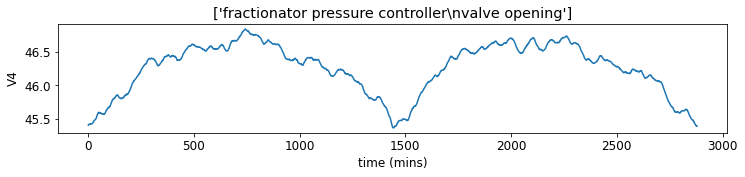

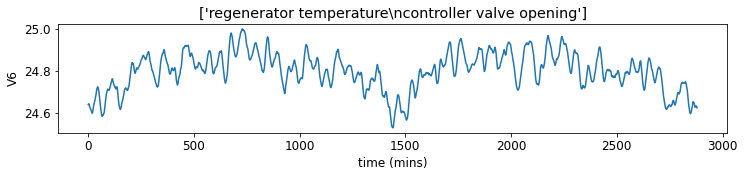

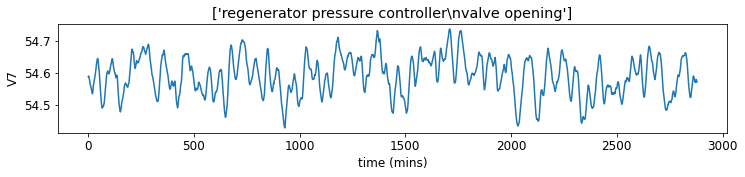

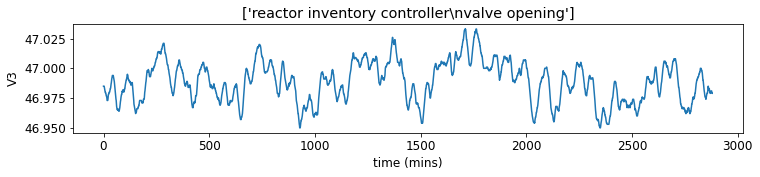

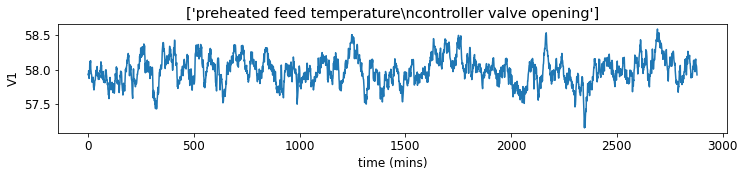

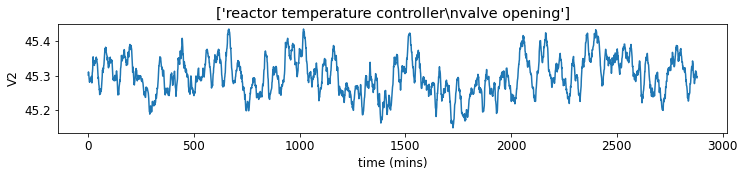

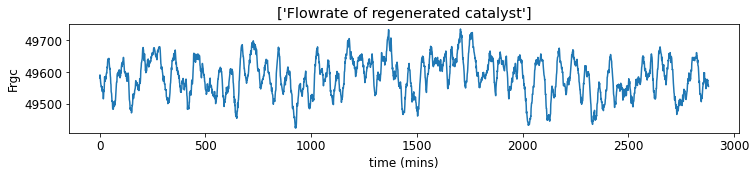

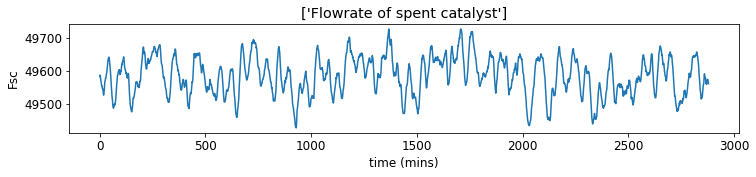

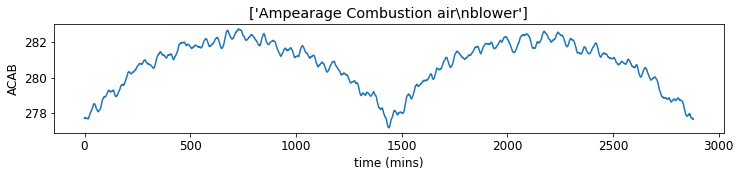

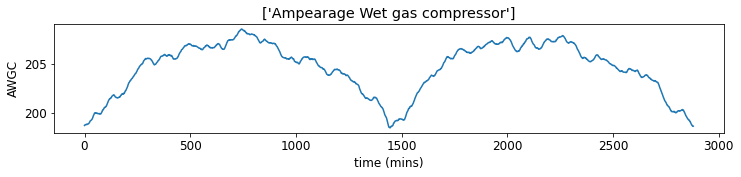

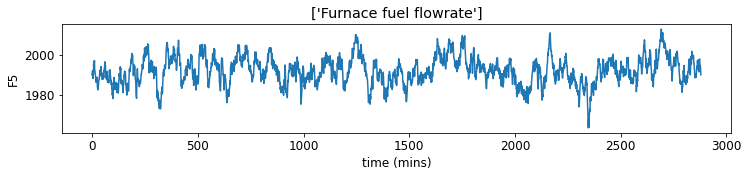

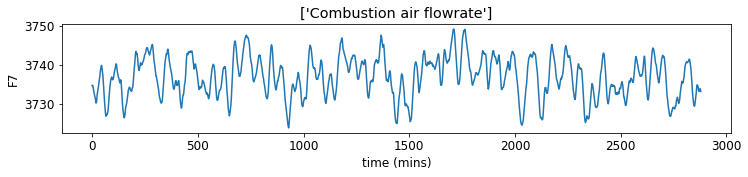

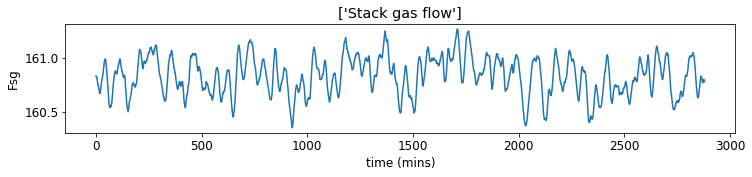

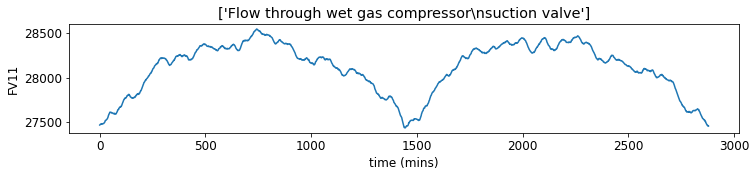

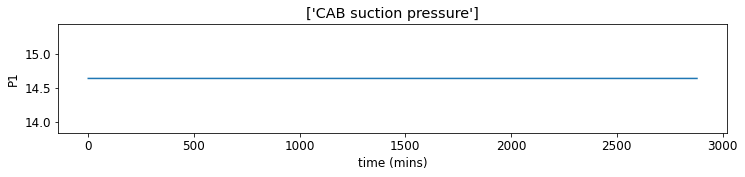

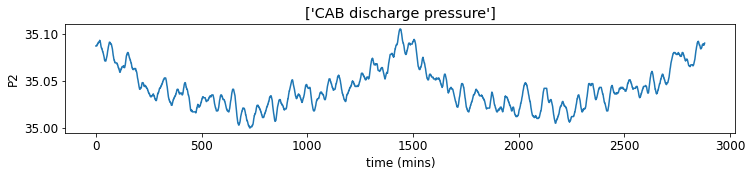

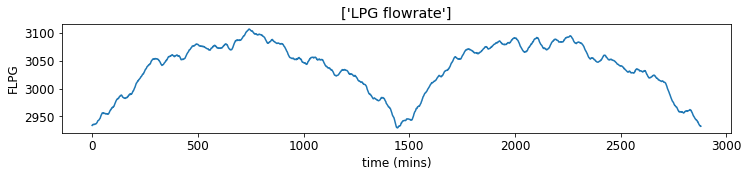

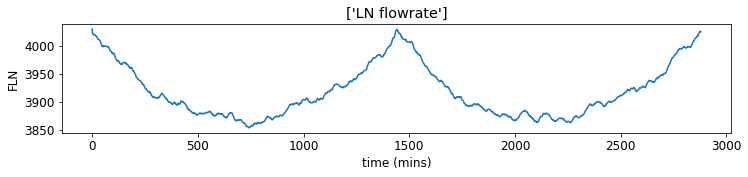

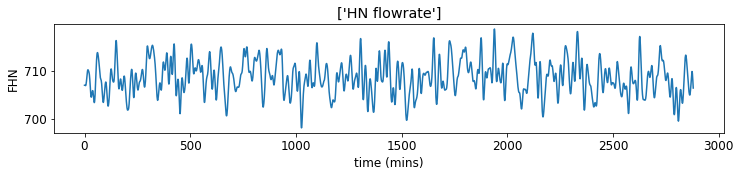

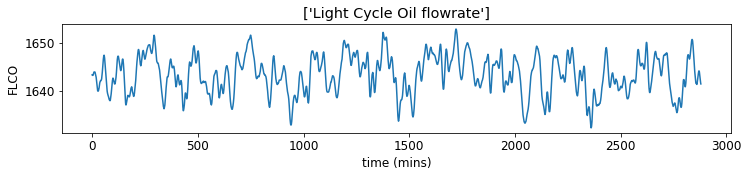

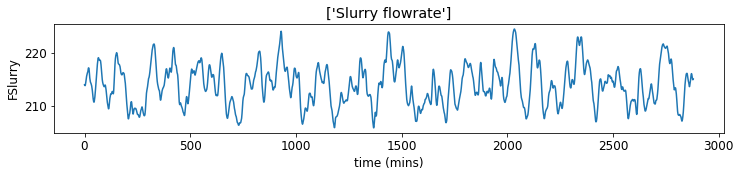

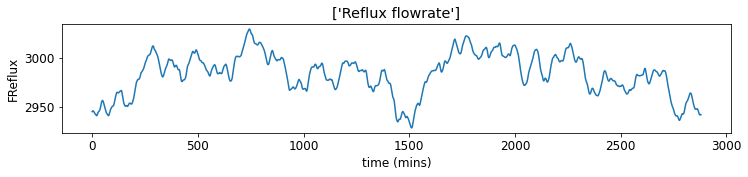

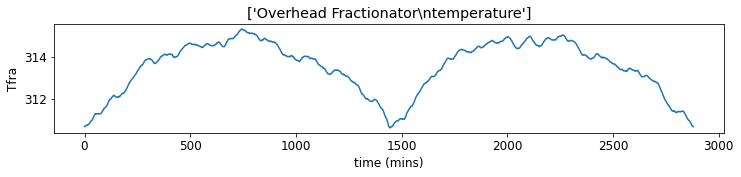

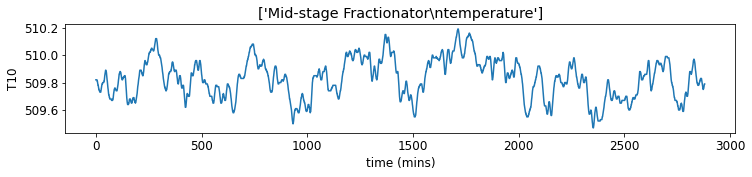

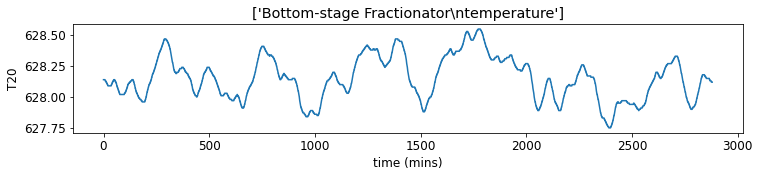

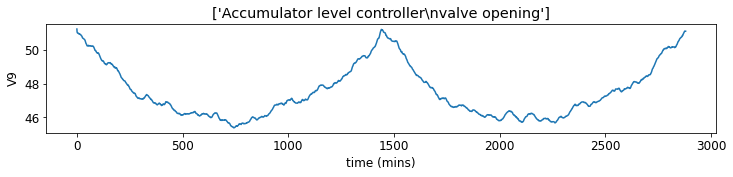

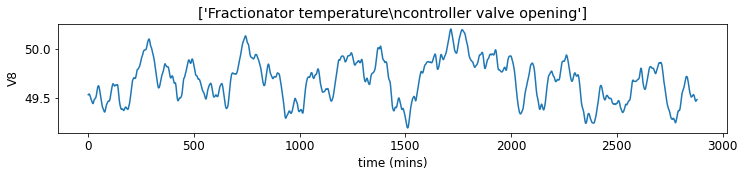

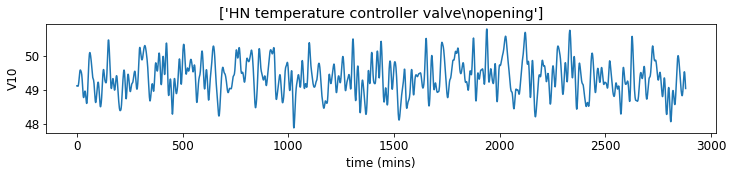

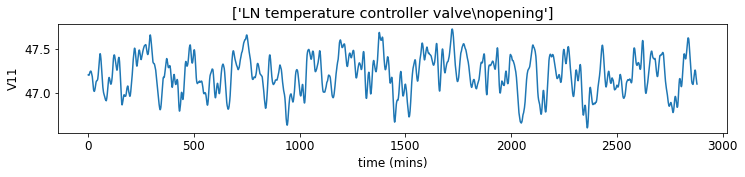

In [9]:
for n,i in enumerate(df_stableFeedFlow.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_stableFeedFlow[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

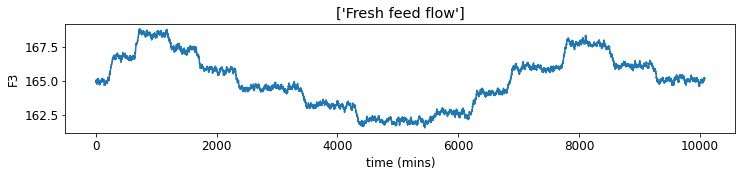

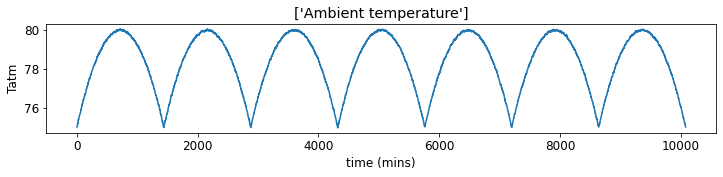

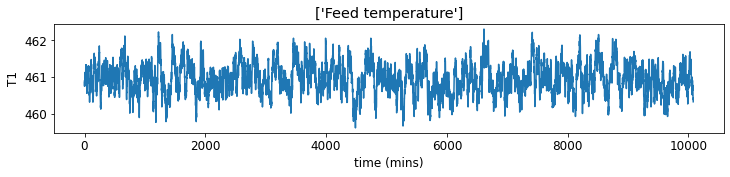

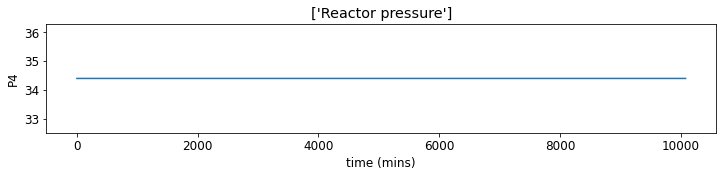

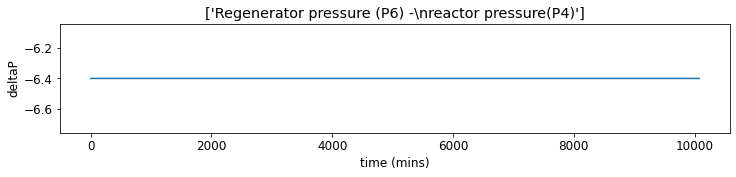

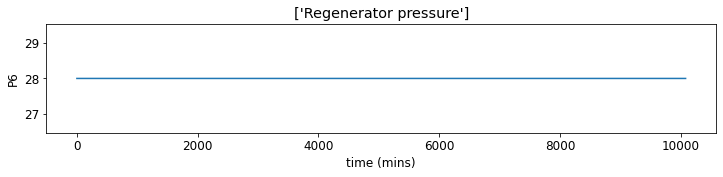

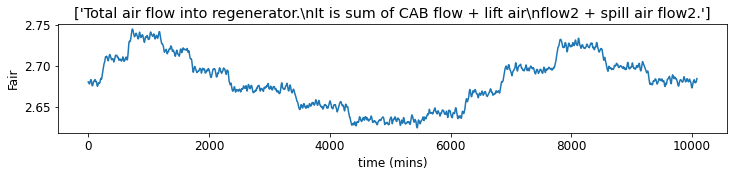

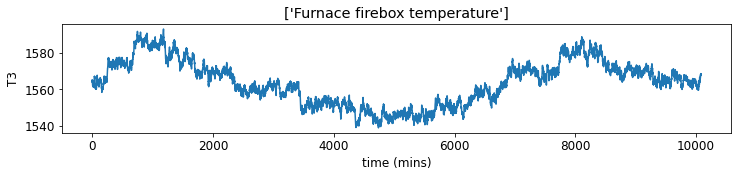

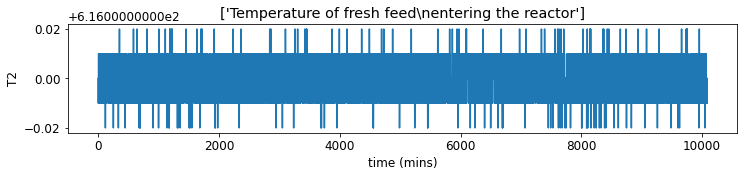

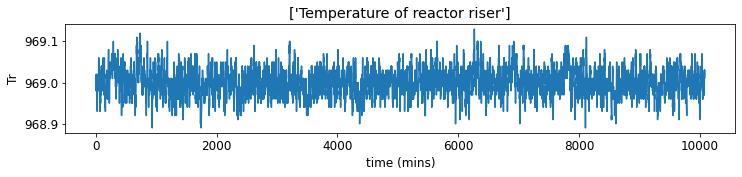

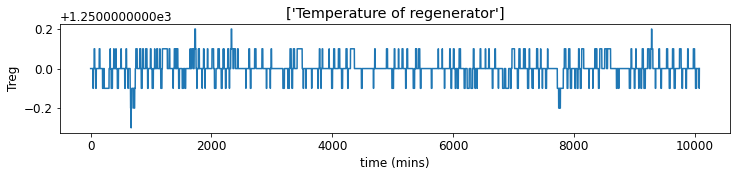

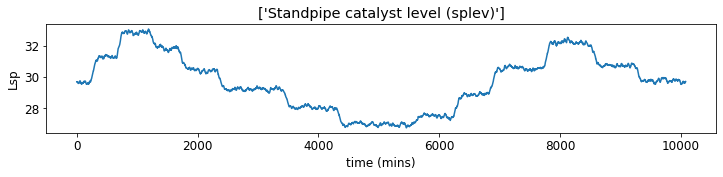

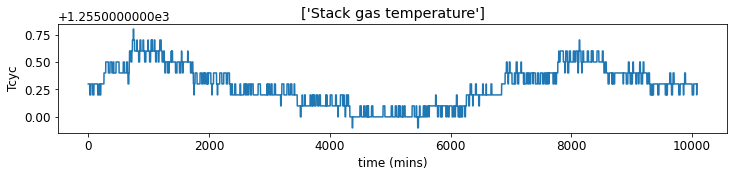

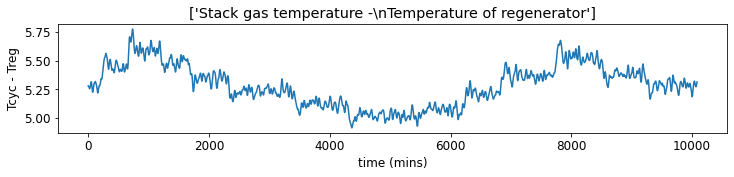

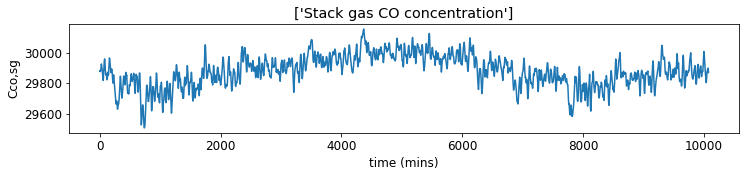

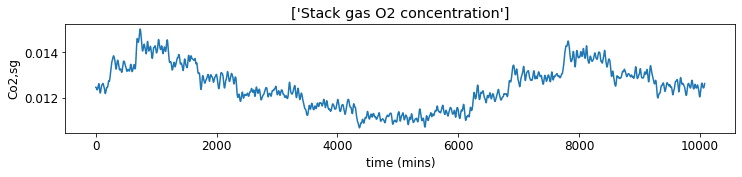

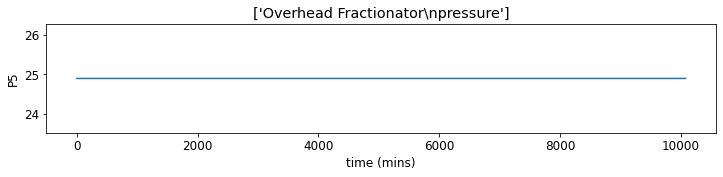

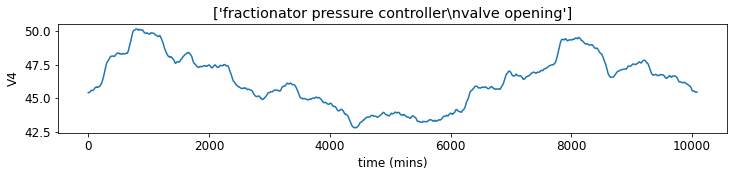

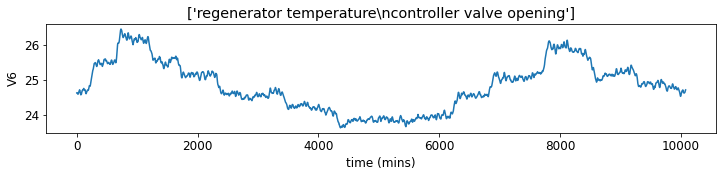

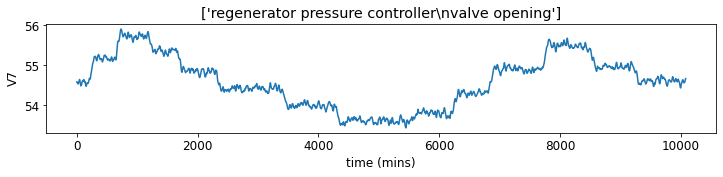

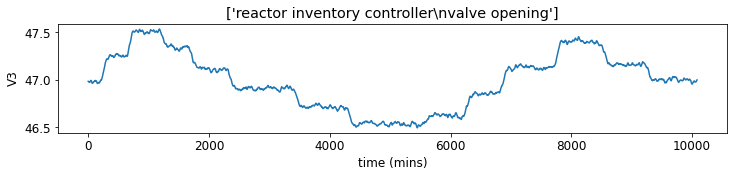

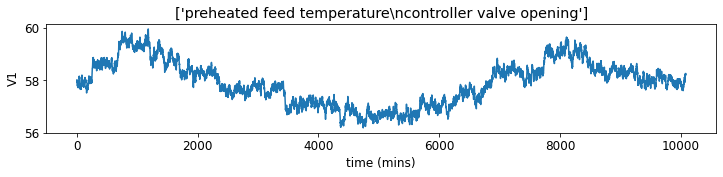

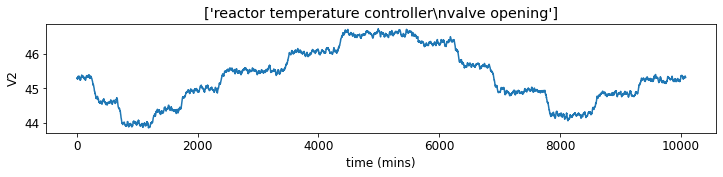

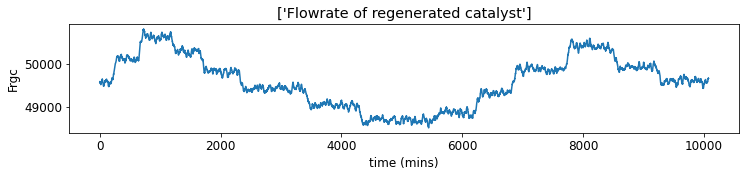

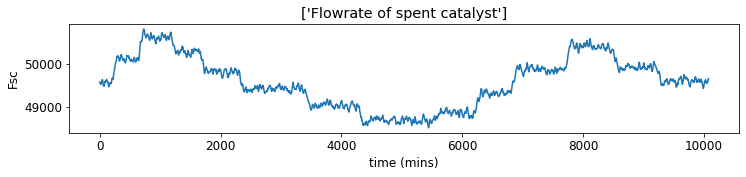

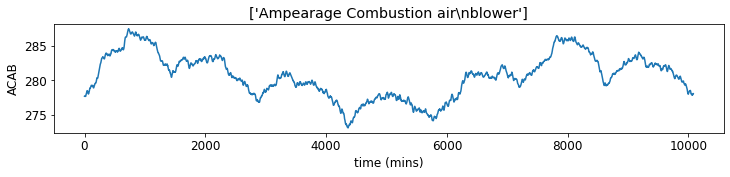

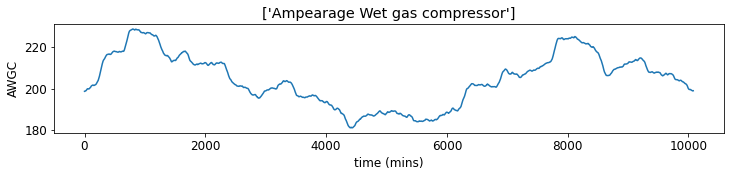

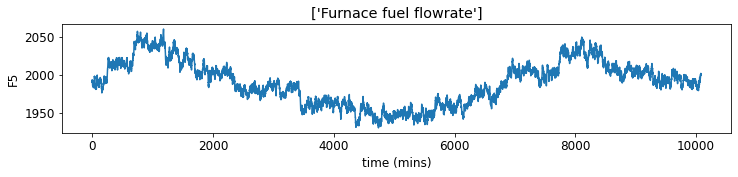

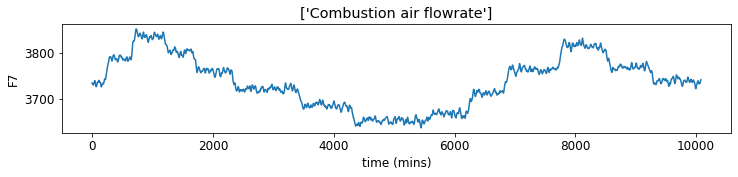

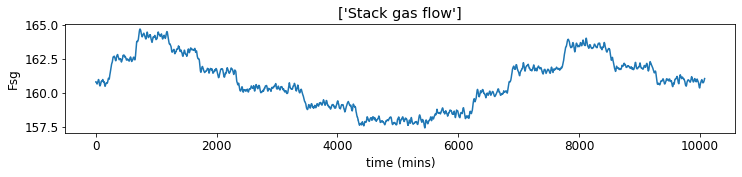

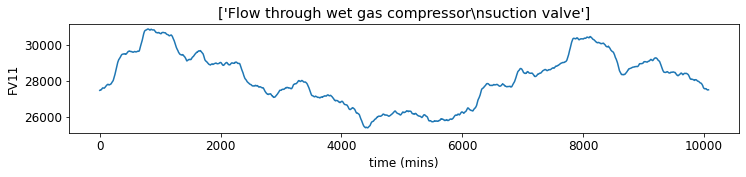

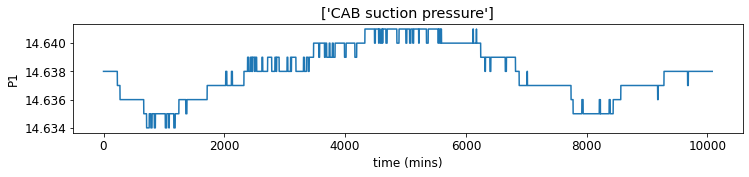

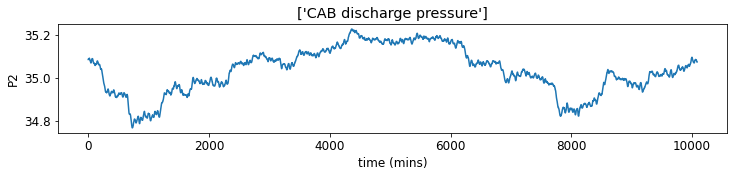

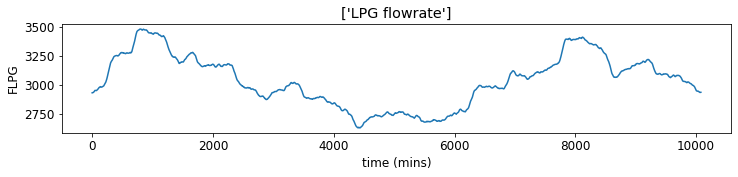

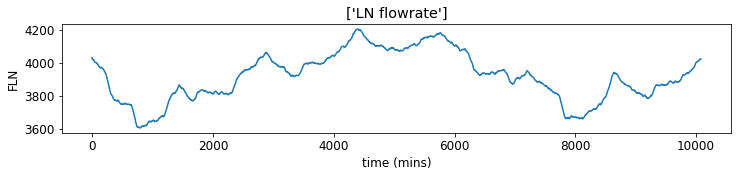

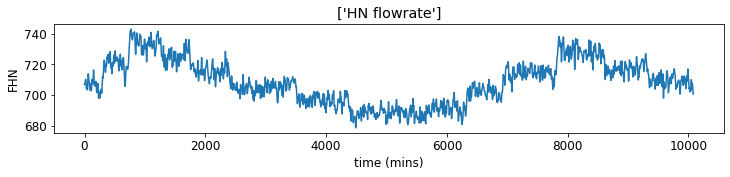

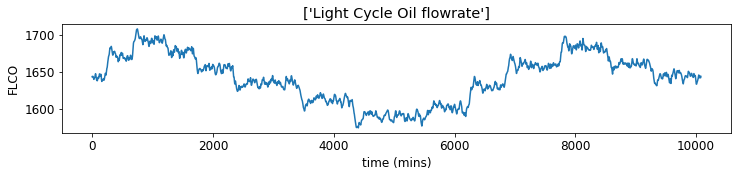

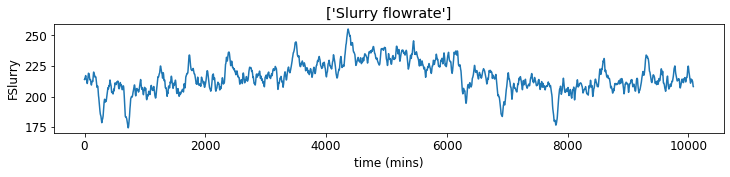

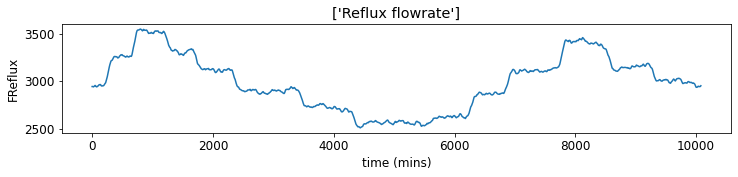

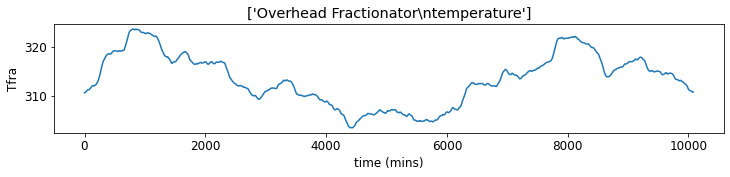

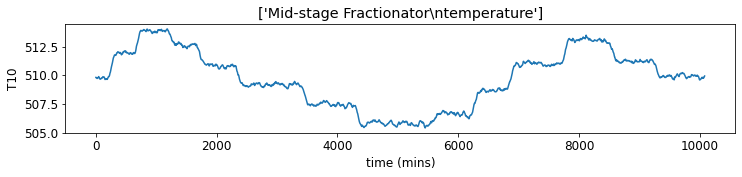

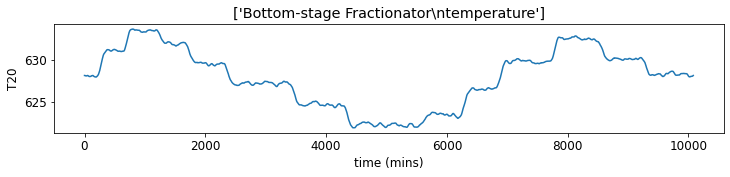

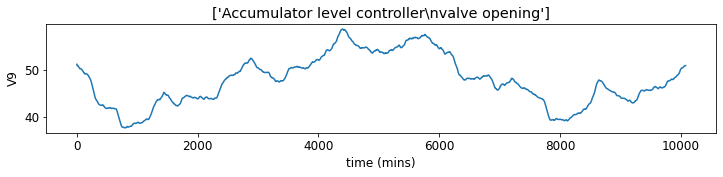

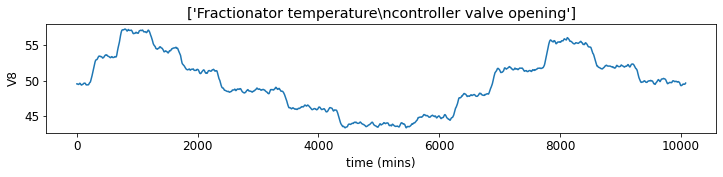

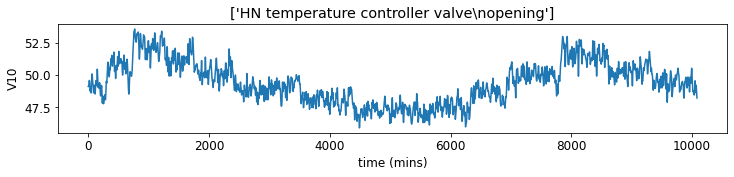

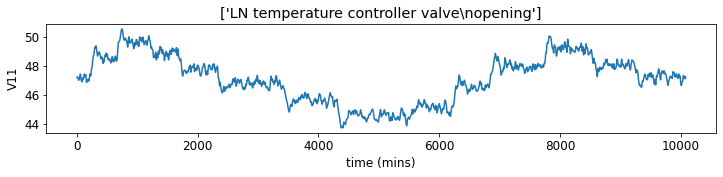

In [10]:
for n,i in enumerate(df_varyingFeedFlow.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_varyingFeedFlow[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

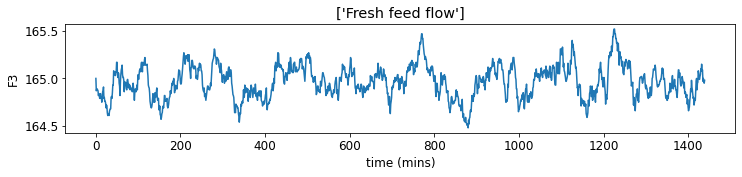

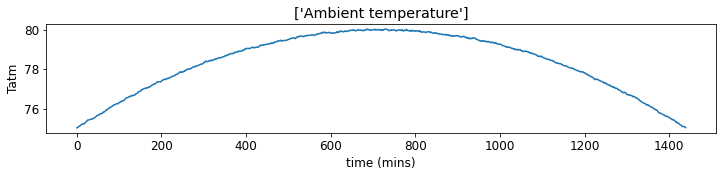

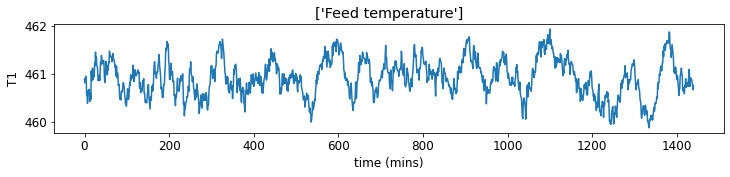

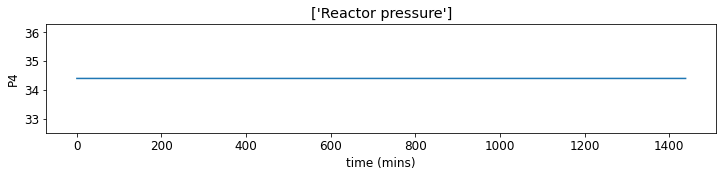

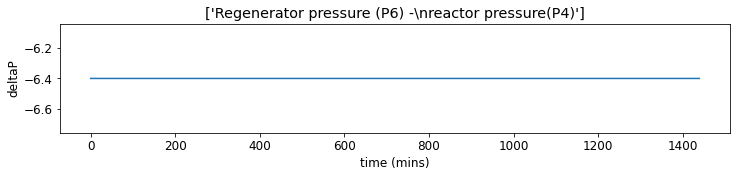

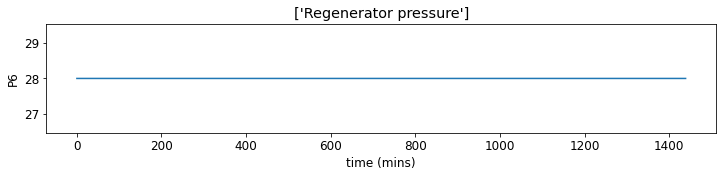

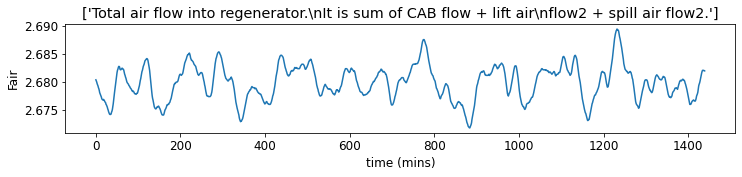

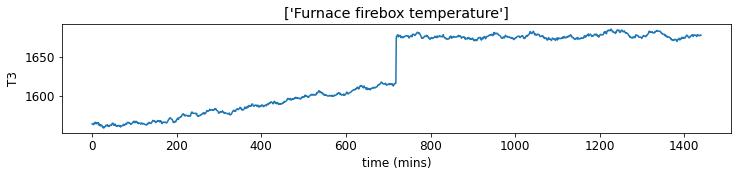

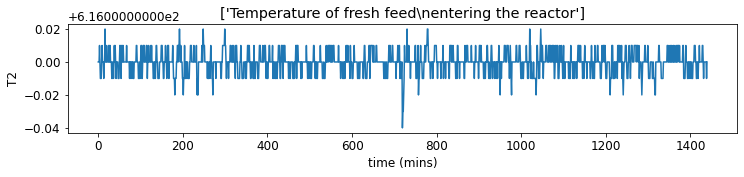

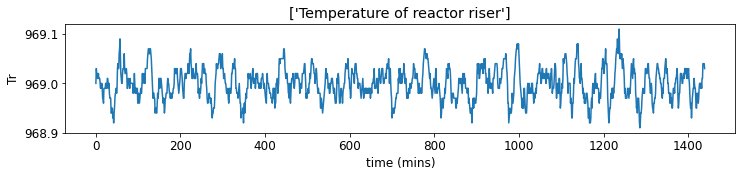

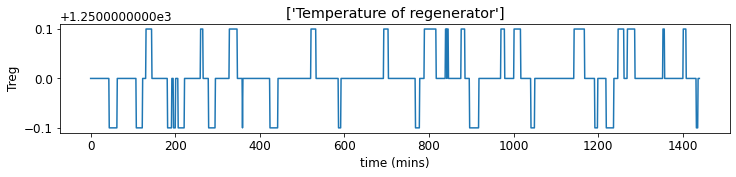

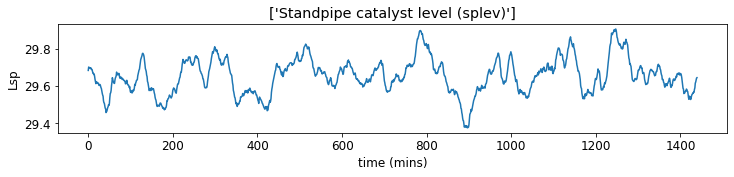

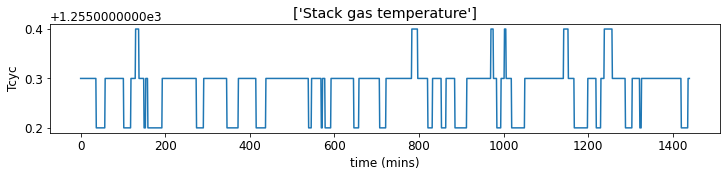

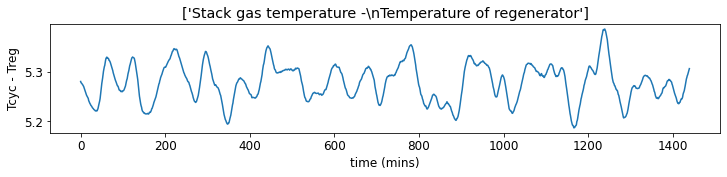

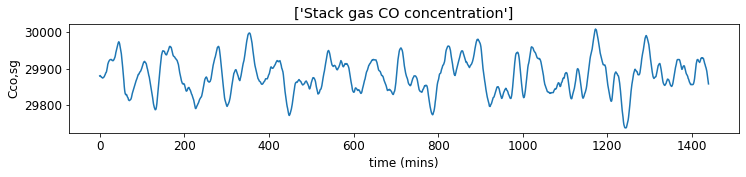

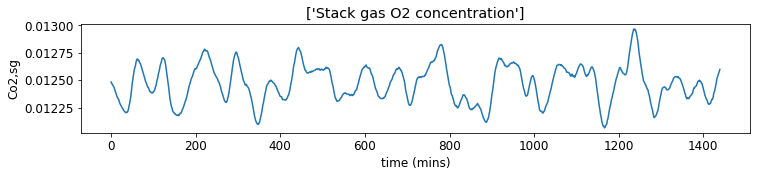

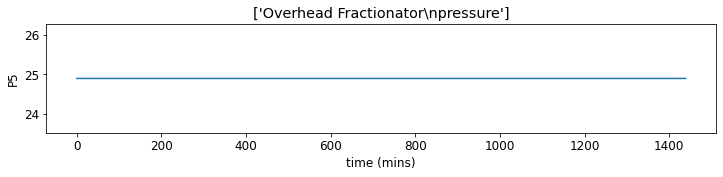

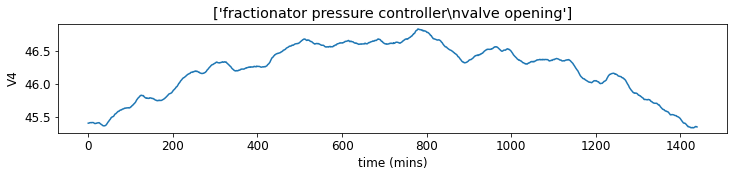

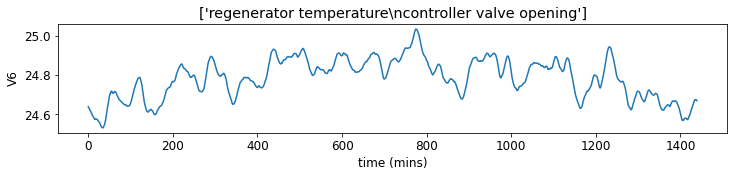

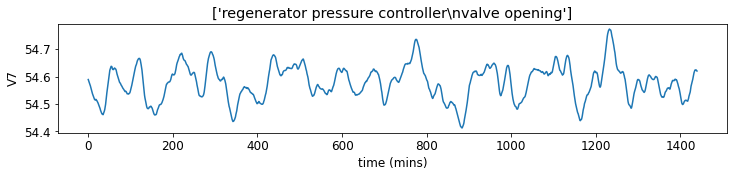

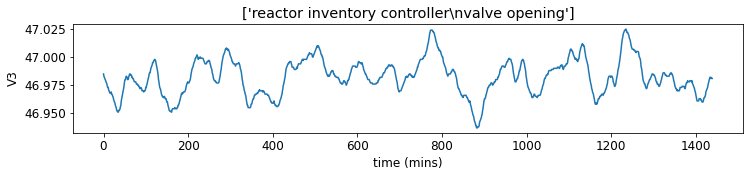

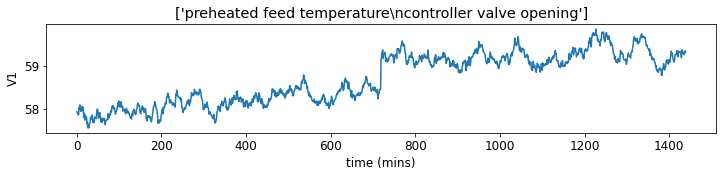

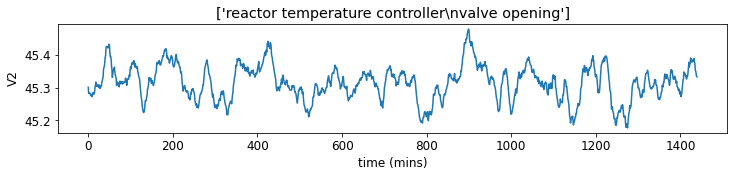

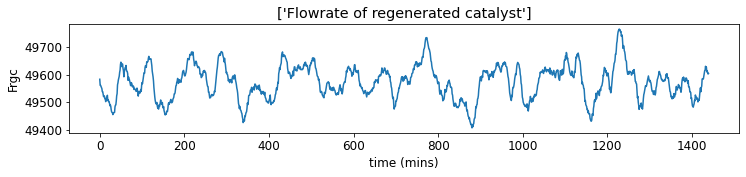

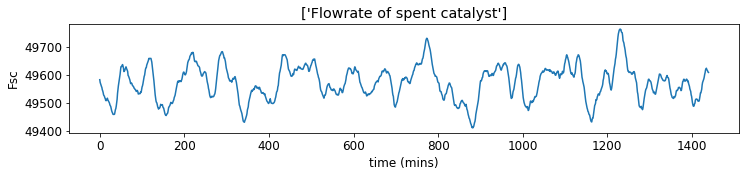

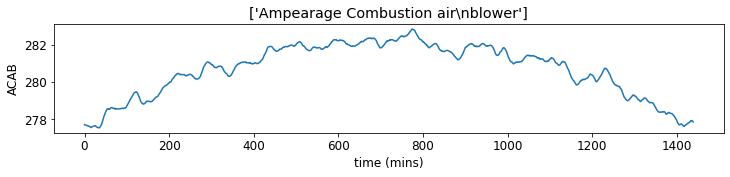

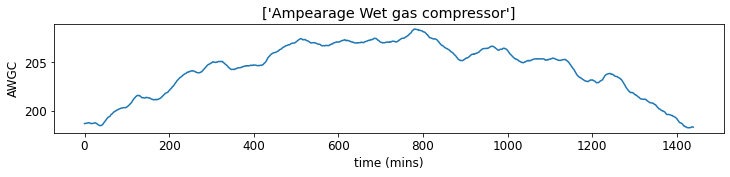

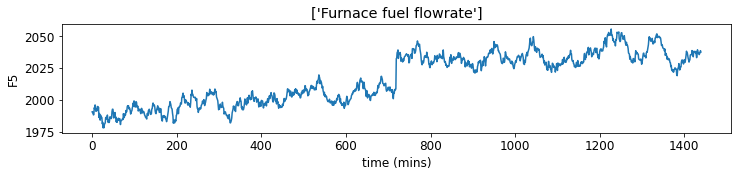

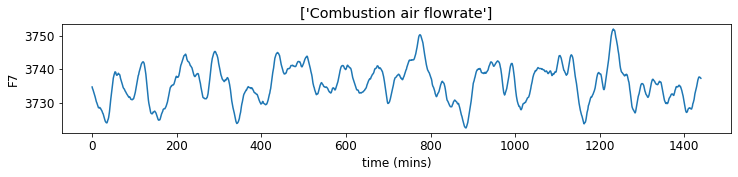

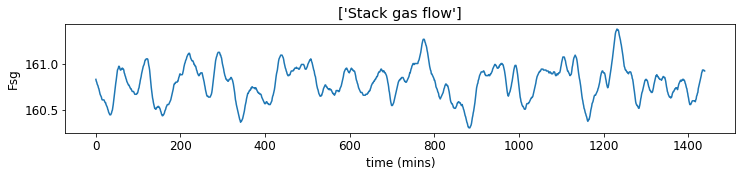

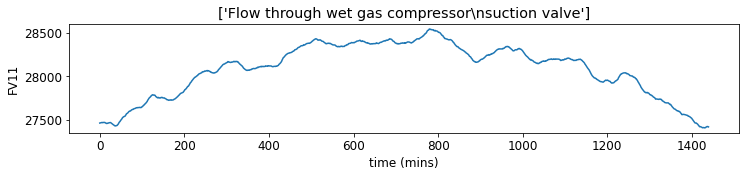

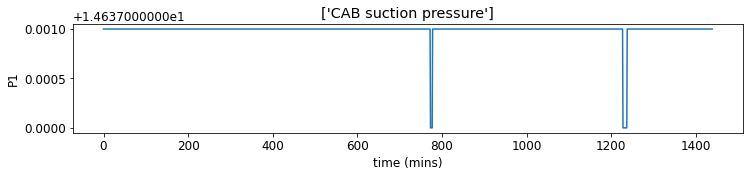

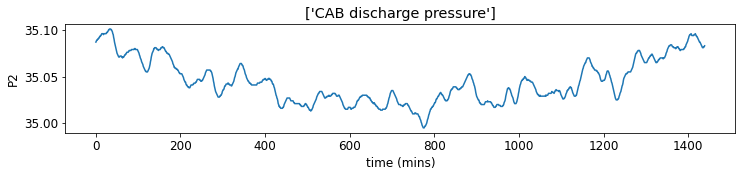

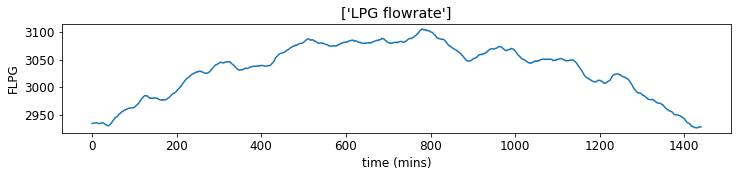

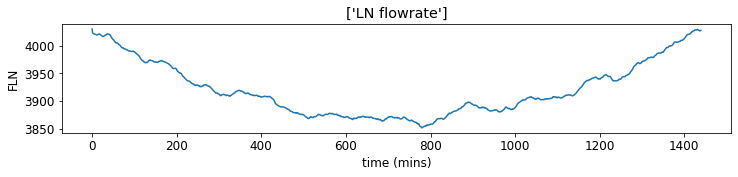

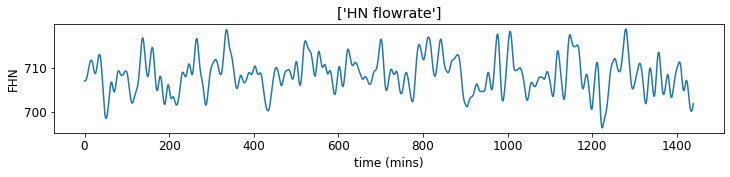

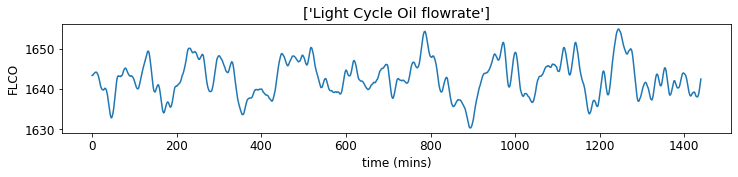

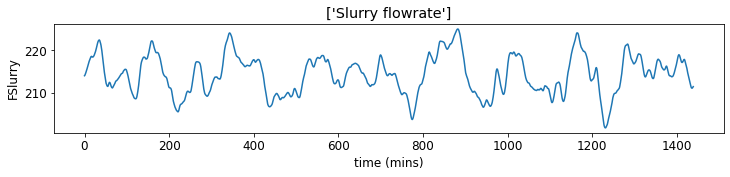

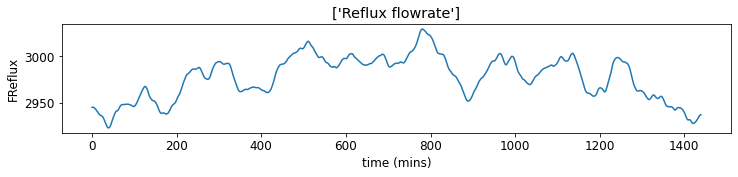

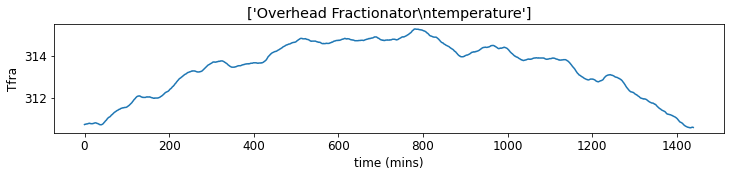

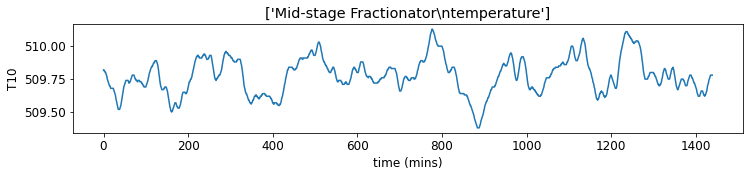

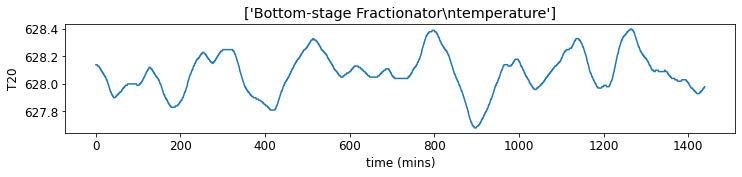

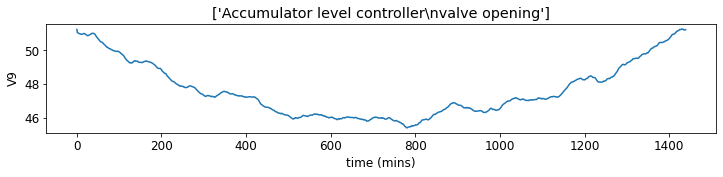

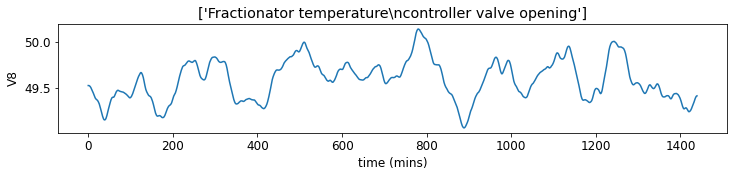

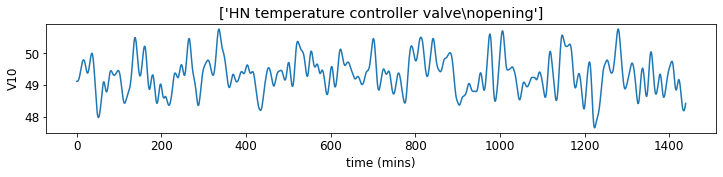

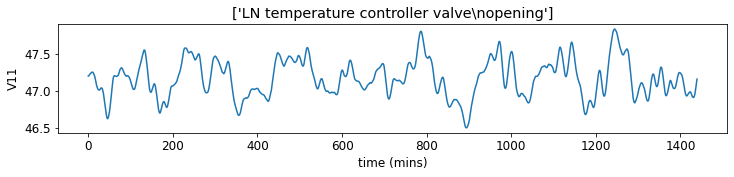

In [11]:
for n,i in enumerate(df_UAf_decrease):
    plt.figure(figsize=(12,2))
    plt.plot(df_UAf_decrease[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
ss = StandardScaler()
pca = PCA()

In [13]:
X = ss.fit_transform(df_stableFeedFlow)
X_pca = pca.fit_transform(X)

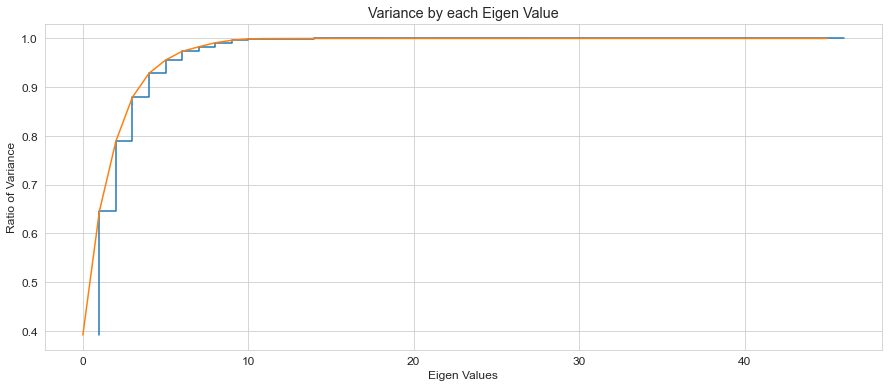

In [14]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,47)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,46)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

In [15]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

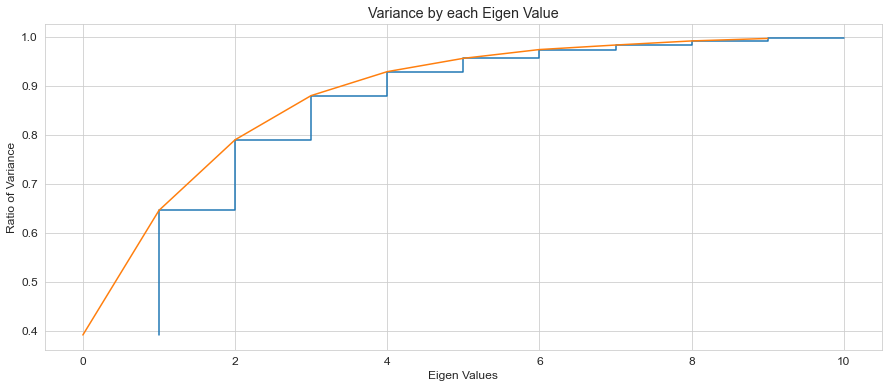

In [16]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,11)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,10)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

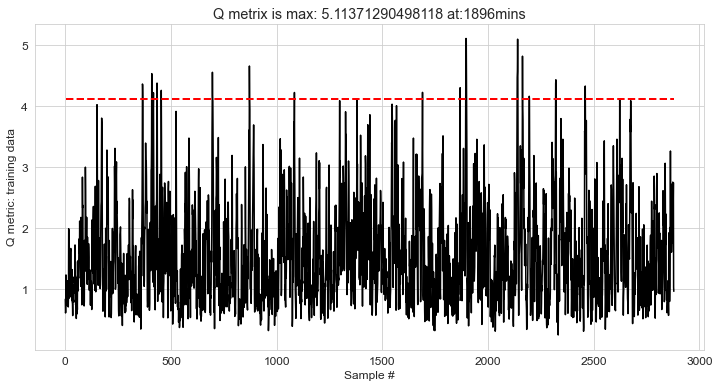

In [17]:
X_reconstructed = np.dot(X_pca,pca.components_)
error_pca = X-X_reconstructed
Q_train = np.sum(np.abs(error_pca),axis=1)
Q_CL = np.percentile(Q_train,99)
# Q_train plot with CL
plt.figure()
plt.plot(Q_train, color='black')
plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Q metric: training data')
plt.title(f'Q metrix is max: {Q_train.max()} at:{Q_train.argmax()}mins')
plt.show()

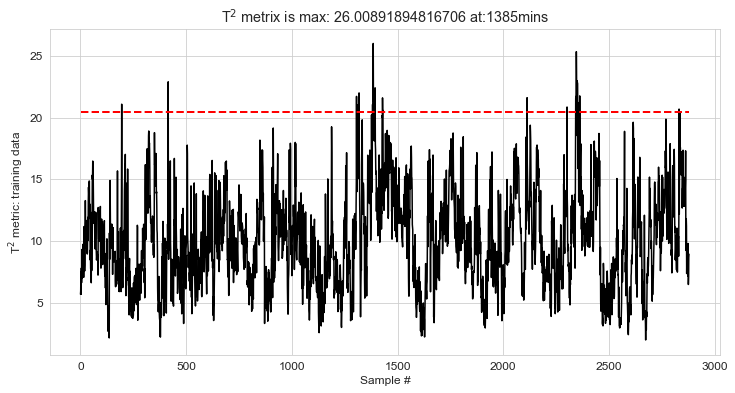

In [18]:
lambda_ = np.diag(pca.explained_variance_)
lambda_inv = np.linalg.inv(lambda_)
T_train = np.zeros(X_pca.shape[0])
for i in range(X_pca.shape[0]):
    T_train[i] = np.dot(np.dot(X_pca[i],lambda_inv),X_pca[i].T)
T_CL = np.percentile(T_train,99)
# T2_train plot with CL
plt.figure()
plt.plot(T_train, color='black')
plt.plot([1,len(T_train)],[T_CL,T_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('T$^2$ metric: training data')
plt.title(f'T$^2$ metrix is max: {np.array(T_train).max()} at:{np.array(T_train).argmax()}mins')
plt.show()

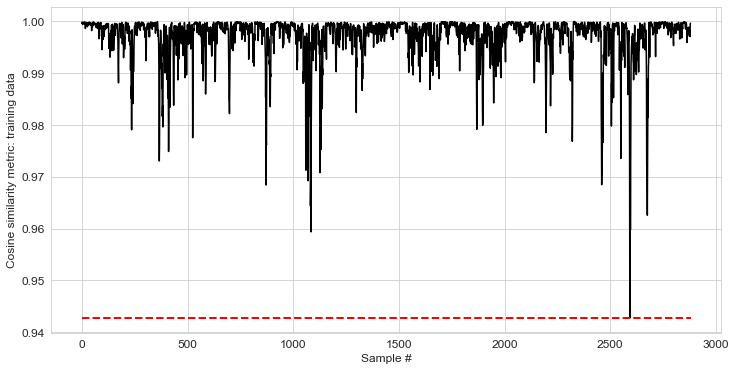

In [19]:
cosine = []
ed = []
for i in range(X.shape[0]):
    v1 = X[i]
    v2 = np.dot(X_pca,pca.components_)[i]
    cosine.append(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
    ed.append(np.linalg.norm(v1 - v2))
C_CL = np.min(cosine)
E_CL = np.percentile(ed,99)
# pd.Series(ed).plot(color='black')
# plt.plot([1,len(ed)],[E_CL,E_CL], linestyle='--',color='red', linewidth=2)
# plt.show()
pd.Series(cosine).plot(color='black')
plt.plot([1,len(cosine)],[C_CL,C_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Cosine similarity metric: training data')
plt.show()

In [20]:
Q_CL,T_CL,C_CL,E_CL

(4.12311321551908, 20.42435035256879, 0.9427550112367163, 0.9281694746755801)

In [21]:
def Q_test(X,X_pca,pca_components_,Q_CL):
    X_reconstructed = np.dot(X_pca,pca_components_)
    error = X-X_reconstructed
    Q_train = np.sum(np.abs(error),axis=1)
    # Q_train plot with CL
    plt.figure()
    plt.plot(Q_train, color='black')
    plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('Q metric: training data')
    plt.title(f'Q metrix is max: {Q_train.max()} at:{Q_train.argmax()}mins')
    plt.show()
    return error

In [22]:
def T_test(X_pca,explained_variance_,TCL):
    lambda_ = np.diag(pca.explained_variance_)
    lambda_inv = np.linalg.inv(lambda_)
    T_train = np.zeros(X_pca.shape[0])
    for i in range(X_pca.shape[0]):
        T_train[i] = np.dot(np.dot(X_pca[i],lambda_inv),X_pca[i].T)
    # T2_train plot with CL
    plt.figure()
    plt.plot(T_train, color='black')
    plt.plot([1,len(T_train)],[T_CL,T_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('T$^2$ metric: training data')
    plt.title(f'T$^2$ metrix is max: {np.array(T_train).max()} at:{np.array(T_train).argmax()}mins')
    plt.show()

In [23]:
def cosine(X,X_transformed,pca_components_,C_CL,E_CL):
    cosine = []
    ed = []
    for i in range(X.shape[0]):
        v1 = X[i]
        v2 = np.dot(X_transformed,pca_components_)[i]
        cosine.append(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
        ed.append(np.linalg.norm(v1 - v2))
#     pd.Series(ed).plot(color='black')
#     plt.plot([1,len(ed)],[E_CL,E_CL], linestyle='--',color='red', linewidth=2)
#     plt.xlabel('Sample #')
#     plt.ylabel('Eucledian Distance metric: training data')
#     plt.show()
    pd.Series(cosine).plot(color='black')
    plt.plot([1,len(cosine)],[C_CL,C_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('Cosine similarity metric: training data')
    plt.title(f'Cosine similarity metrix is mix: {np.array(cosine).min()} at:{np.array(cosine).argmin()}mins')
    plt.show()

In [24]:
X = ss.transform(df_varyingFeedFlow)
X_test = pca.transform(X)

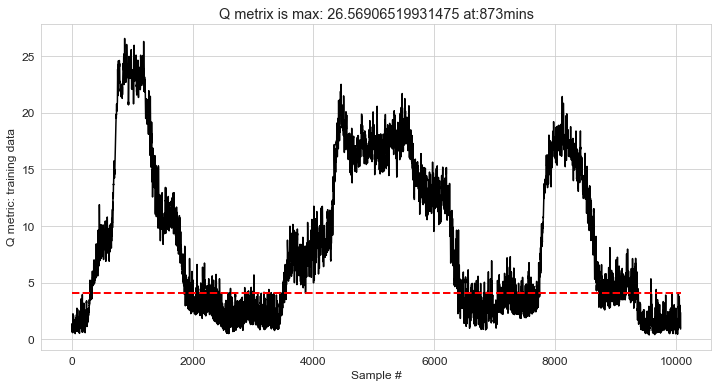

In [25]:
error = Q_test(X,X_test,pca.components_,Q_CL)

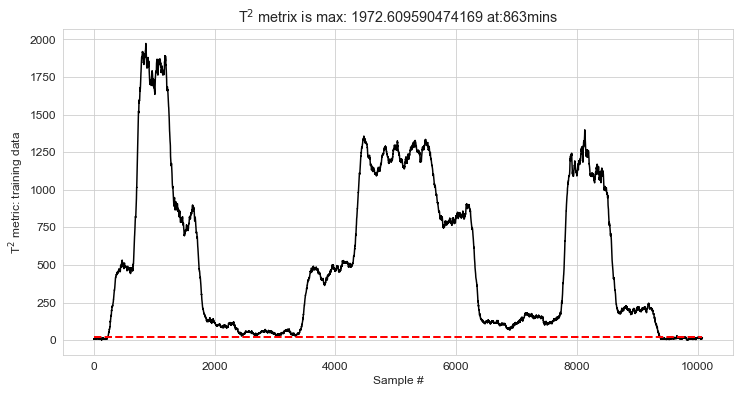

In [26]:
T_test(X_test,pca.explained_variance_,T_CL)

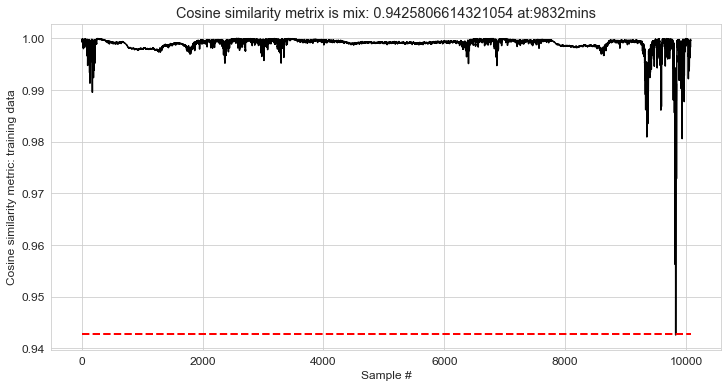

In [27]:
cosine(X,X_test,pca.components_,C_CL,E_CL)

In [28]:
X = ss.transform(df_UAf_decrease)
X_test = pca.transform(X)

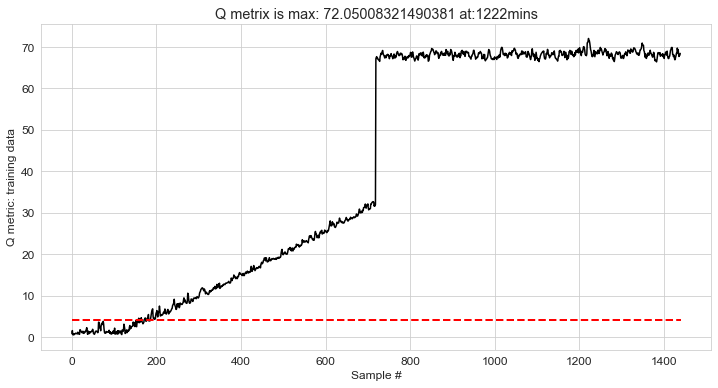

In [29]:
error = Q_test(X,X_test,pca.components_,Q_CL)

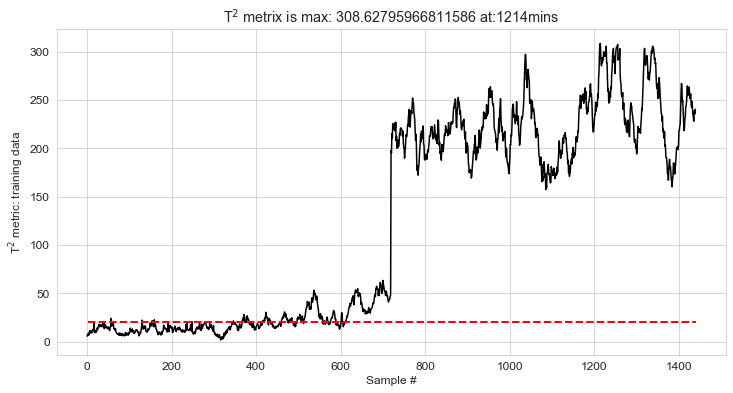

In [30]:
T_test(X_test,pca.explained_variance_,T_CL)

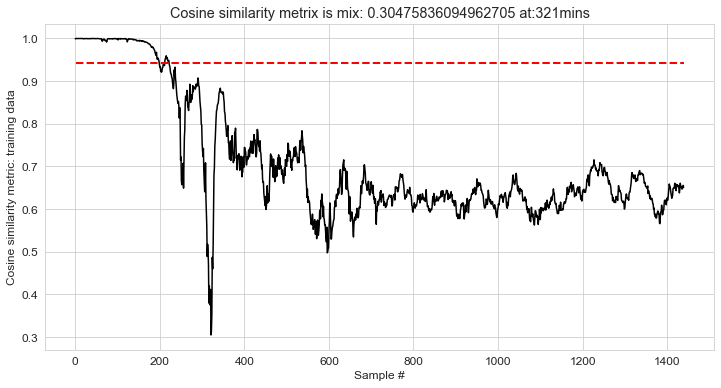

In [31]:
cosine(X,X_test,pca.components_,C_CL,E_CL)

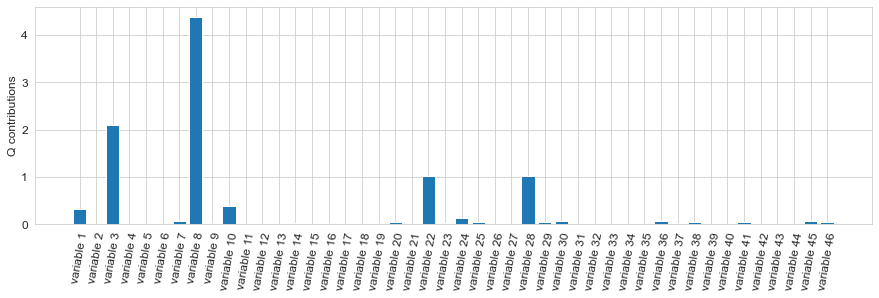

In [32]:
#%% Q contribution
sample = 321

error_test_sample = error[sample]
Q_contri = np.abs(error_test_sample) # *error_test_sample # vector of contributions

plt.figure(figsize=[15,4])
plt.bar(['variable ' + str((i+1)) for i in range(len(Q_contri))], Q_contri)
plt.xticks(rotation = 80)
plt.ylabel('Q contributions')
plt.show()

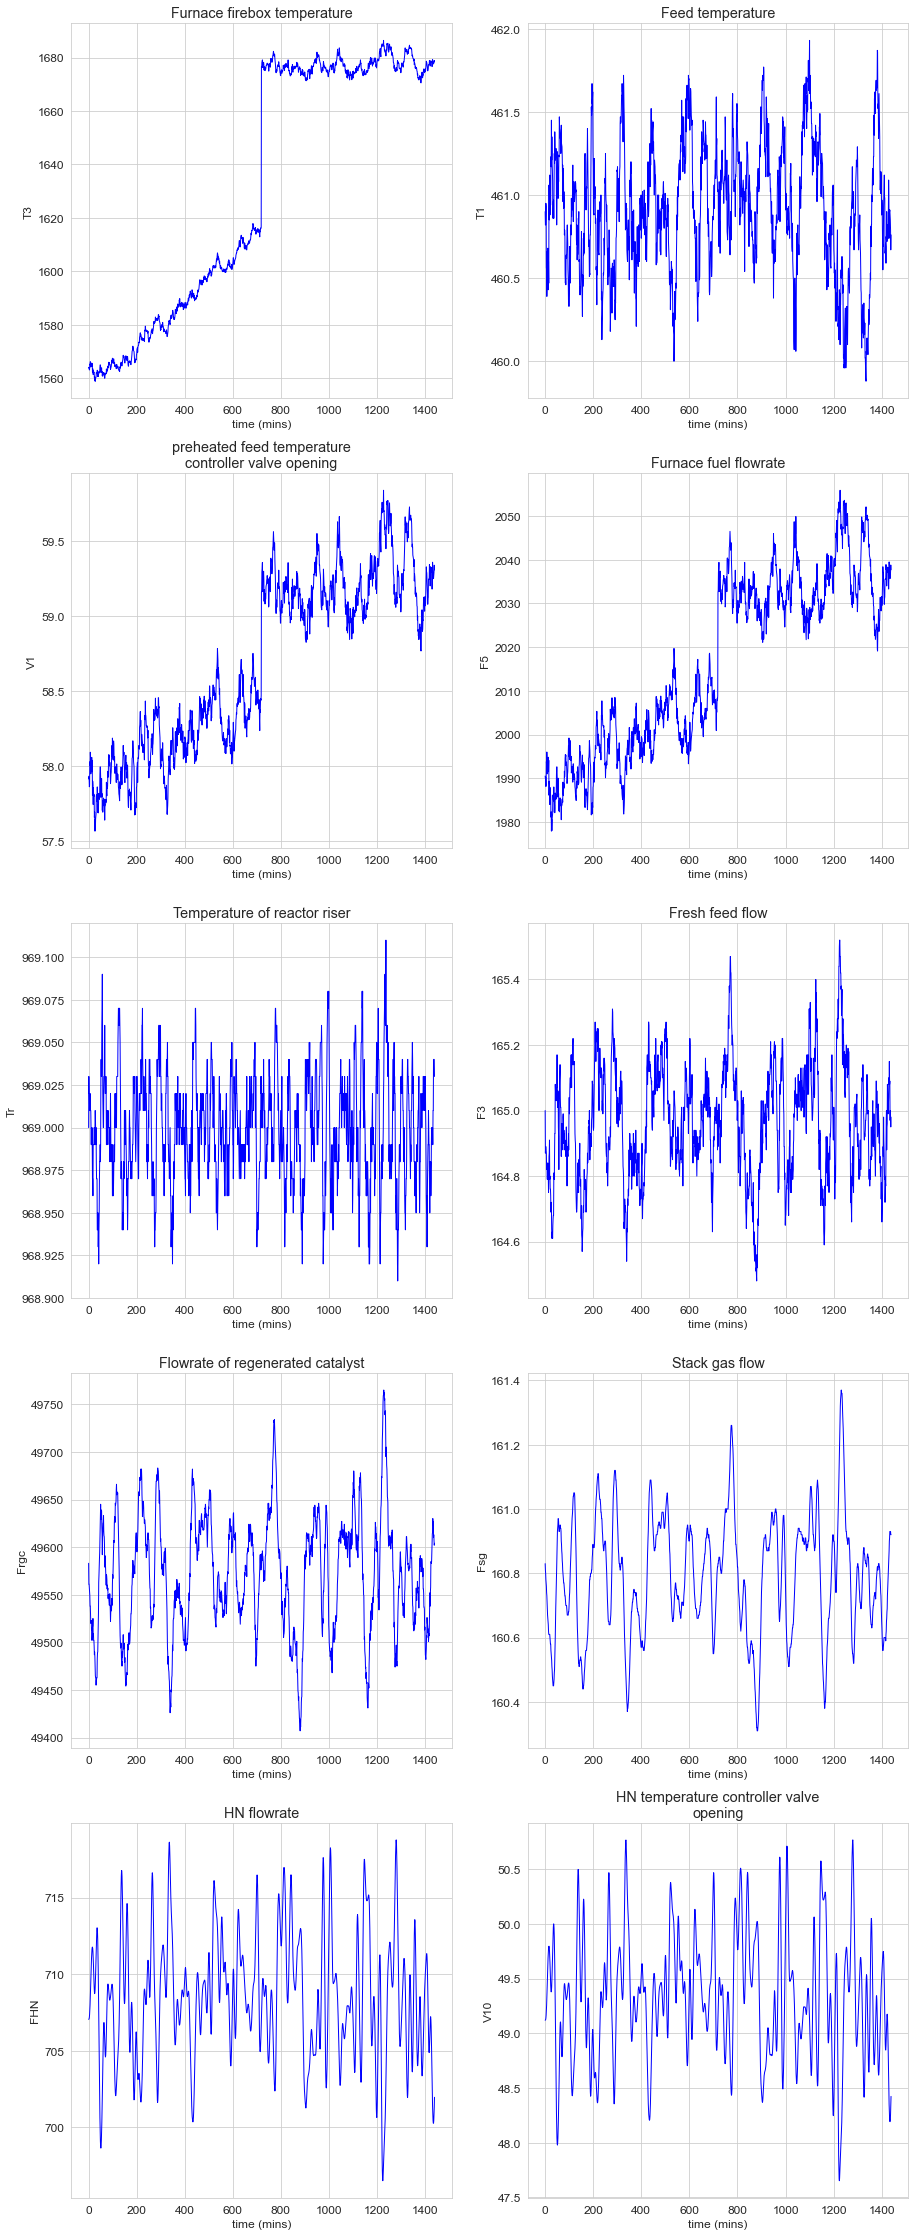

In [33]:
plt.figure(figsize=(15,40))
for i,n in enumerate(np.argsort(Q_contri)[:-11:-1]):
    plt.subplot(5,2,i+1)
    plt.plot(df_UAf_decrease.iloc[:,n],'blue', linewidth=1)
    plt.xlabel('time (mins)')
    plt.ylabel(df['Symbol'][n])
    plt.title(df['Description'][n])
    plt.show